In this notebook, we train a Decision Tree classificatory model to classify stars following the Harvard classification based on effective temperature.

# Setup

In [3]:
# --- Core Data & Math Libraries ---
import numpy as np                   # Array operations and linear algebra
import pandas as pd                  # Data manipulation and analysis
from pathlib import Path             # Object-oriented filesystem paths
import os                            # Operating system utilities

# --- Scikit-Learn Components ---
# Preprocessing
from sklearn.preprocessing import (
    LabelEncoder,                   # Encode categorical labels
    StandardScaler                  # Feature scaling
)

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    make_scorer                     # Custom scoring for cross-validation
)

# Data Splitting & Validation
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,                # Cross-validation scoring
    StratifiedKFold                 # Stratified cross-validation
)

# --- Imbalanced Learning ---
from imblearn.over_sampling import SMOTE  # Synthetic minority oversampling

# --- Visualization of results ---
import matplotlib.pyplot as plt     # plotting tools
import seaborn as sns               # custom visualization

# --- Path Configuration ---
notebook_path = Path().absolute()    # Current notebook location
project_root = notebook_path.parent  # Project root directory

We start by reading our data from the Gold layer.

In [5]:
# reading the data from the gold layer
dfG = pd.read_csv(project_root/'data'/'gold'/'starG_harvard.csv')
dfG

,identifier,observation_id,observation_date,harvard_classification,harvard_subclass,class,full_class,effective_temperature,log_surface_gravity,metallicity_fe_h,radial_velocity,redshift
0,3007021652015-01-19 12:00:00,300702165,2015-01-19 12:00:00,K,K3,K,K4,4729.36,4.741,-0.128,42.15,0.000141
1,2151092011-10-23 12:00:00,215109,2011-10-23 12:00:00,K,K3,G,G8,4642.57,4.662,-0.363,36.61,0.000122
2,181121112011-12-18 12:00:00,18112111,2011-12-18 12:00:00,K,K3,K,K3,4664.49,4.690,-0.207,35.04,0.000117
3,3674121992015-10-07 12:00:00,367412199,2015-10-07 12:00:00,K,K2,G,G9,4960.44,4.613,-0.262,-35.46,-0.000118
4,181121792011-12-18 12:00:00,18112179,2011-12-18 12:00:00,G,K0,G,G8,5371.04,4.296,-0.248,-29.91,-0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6860020462018-10-30 12:00:00,686002046,2018-10-30 12:00:00,F,G0,F,F2,6061.88,3.811,-0.240,9.94,0.000033
49996,3819020372015-11-02 12:00:00,381902037,2015-11-02 12:00:00,F,G1,F,F2,6033.30,4.190,-0.458,35.12,0.000117
49997,3819020432015-11-02 12:00:00,381902043,2015-11-02 12:00:00,K,K1,G,G9,5066.79,3.210,-0.247,-26.94,-0.000090
49998,2542040182014-10-14 12:00:00,254204018,2014-10-14 12:00:00,G,G8,G,G7,5571.65,4.073,0.435,1.68,0.000006


# 1. Decision Tree Model

We now proceed to train the classifying model using the $\tt Scikit-Learn$ machine learning library. Due to the deterministic nature of the Harvard classification, we choose a simple Decision Tree model for, with enough depth for the tree, it should be able to correctly classify stars according to the Harvard system. 

In [8]:
# Configuration
TARGET_COLUMN    = ['harvard_subclass']                                   # Target label

FEATURE_COLUMNS = ['effective_temperature']

# Data preparation
label_encoder = LabelEncoder()                                 # Initialize label encoder
y = label_encoder.fit_transform(dfG[TARGET_COLUMN])           # Encode target variable
X = dfG[FEATURE_COLUMNS]                                      # Select features

# Stratified train-test split
X_train, X_val, y_train, y_val = train_test_split(             # Split dataset
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Class balancing with SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=42)  # Initialize SMOTE
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)   # Apply to training data


# Model training
model = DecisionTreeClassifier(                                # Random Forest classifier
    max_depth=20,                                               # Maximum tree depth
    random_state=42                                            # Seed
)

model.fit(X_train_res, y_train_res)                            # Train on resampled data

# Evaluation
y_pred = model.predict(X_val)                                  # Predict on validation set
print("\n=== Enhanced Evaluation ===")                         
print(f"Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")  # Print accuracy
print("\nClassification Report:")                              
print(classification_report(y_val, y_pred,                      # Report metrics
                            target_names=label_encoder.classes_,
                            zero_division=0))

# Model wrapper for reuse
def class_classifier():
    return model

C:\Users\natha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



=== Enhanced Evaluation ===
Validation Accuracy: 0.9999

Classification Report:
              precision    recall  f1-score   support

          F0       1.00      1.00      1.00        21
          F2       1.00      1.00      1.00        42
          F3       1.00      1.00      1.00        45
          F5       1.00      1.00      1.00        74
          F6       1.00      1.00      1.00       140
          F7       1.00      1.00      1.00       275
          F8       1.00      1.00      1.00       323
          G0       1.00      1.00      1.00      1427
          G1       1.00      1.00      1.00       915
          G2       1.00      1.00      1.00      1237
          G5       1.00      1.00      1.00      1540
          G8       1.00      1.00      1.00      2126
          K0       1.00      1.00      1.00      1450
        K0.5       1.00      1.00      1.00       812
          K1       1.00      1.00      1.00       842
          K2       1.00      1.00      1.00       871


The above results can be better visualized in Confusion Matrix Form.


=== Seaborn Confusion Matrix ===


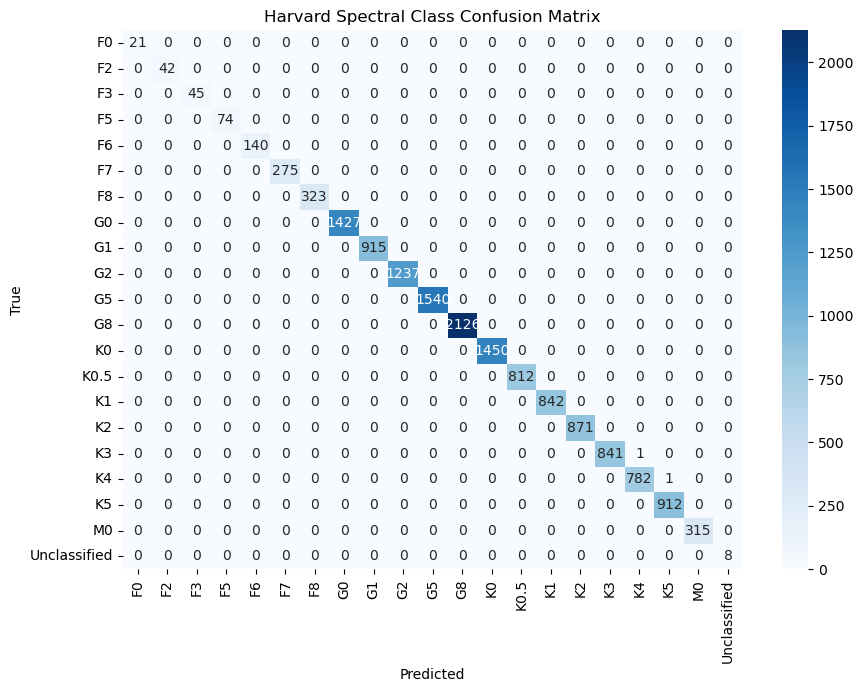

In [10]:
# Generate and plot confusion matrix
print("\n=== Seaborn Confusion Matrix ===")
cm = confusion_matrix(y_val, y_pred)

# Create heatmap visualization
plt.figure(figsize=(10, 7))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Harvard Spectral Class Confusion Matrix')
plt.show()

A direct visualization of the validation and predicted labels highlights the sucess of this simple model.

In [12]:
# Convert encoded y_val and y_pred back to class names
y_val_names = label_encoder.inverse_transform(y_val)
y_pred_names = label_encoder.inverse_transform(y_pred)

# Create a comparison DataFrame
results = pd.DataFrame({
    'Actual': y_val_names,
    'Predicted': y_pred_names,
    'Correct': y_val_names == y_pred_names  # Check if prediction was correct
})

# Display the results
print("\n=== Validation Set Predictions ===")
print(results)


=== Validation Set Predictions ===
      Actual Predicted  Correct
0         K5        K5     True
1         F8        F8     True
2         G2        G2     True
3         G2        G2     True
4         F5        F5     True
...      ...       ...      ...
14995     G5        G5     True
14996     G1        G1     True
14997     F8        F8     True
14998     K2        K2     True
14999     G0        G0     True

[15000 rows x 3 columns]


To test the consistency of the above results, we also perform cross-validation of our Random Forest model.

In [22]:
# Configure cross-validation (StratifiedKFold preserves class balance)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(
    estimator=model,
    X=X_train_res,  # Using SMOTE-resampled data
    y=y_train_res,
    cv=cv,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1  # Parallel processing
)

# Print results
print("\n=== Cross-Validation Results ===")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
print("Individual Fold Accuracies:", [f"{x:.4f}" for x in cv_scores])

# Compare with validation set performance
val_accuracy = accuracy_score(y_val, y_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")

# Overfitting check
if cv_scores.mean() > val_accuracy + 0.05:  # Threshold for significant drop
    print("\n Warning: Potential overfitting (CV >> Validation accuracy)")
elif cv_scores.mean() < val_accuracy - 0.05:
    print("\n Warning: Potential underfitting (CV << Validation accuracy)")
else:
    print("\n Model generalizes well (CV ≈ Validation accuracy)")


=== Cross-Validation Results ===
Mean CV Accuracy: 0.9999 (±0.0000)
Individual Fold Accuracies: ['1.0000', '1.0000', '0.9999', '0.9999', '1.0000']

Validation Accuracy: 0.9999

 Model generalizes well (CV ≈ Validation accuracy)


The obtained results show that the resulting model does not present overfitting, with the high accuracy being an artifact of the rather simple Harvard classification system.